# Replicating Meb Faber's Momentum Based SMA Timing Strategy (S&P500 and GTAA)

**Rules**
- Buy when monthly price > 10 month SMA <br>
- Sell when monthly price < 10 month SMA <br>
1. All entry and exit prices on last day of month close <br>
2. Uses total return series (dividends included) - Using SPXT periodic returns from BBG <br>
3. Cash returns estimated with 90-day T bills - Estimated using 30-day T bills <br>
4. Taxes, commissions, slippage excluded

**Sensitivity Analysis**
1. Use different Simple Moving Average Windows: change code of MOVING_AVERAGE_WINDOW to 3-month moving average or 100 days, or 16-month moving average or 500 days. 
2. Add a delay: change parameter in shift() for calculating period returns of strategy (data['Strategy_Return'] = np.where(data.Buy.shift(2) == True, data.Return, 1.0))
3. Test on more recent modern data: time series of 2013-2023 (change name of excel sheet file of assets, Tbill, and GTAA balance to end with "recent" and change years input to YEARS = 11)
4. Update model at the halfway point of each month (change name of excel sheet file of assets, Tbill, and GTAA balance to end with "mid")

## Replication with 1 Asset (S&P500)

### S&P500 Buy & Hold (1901-2012)

C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\3920322688.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('SPX_simple.csv', index_col='Date', parse_dates=['Date'])


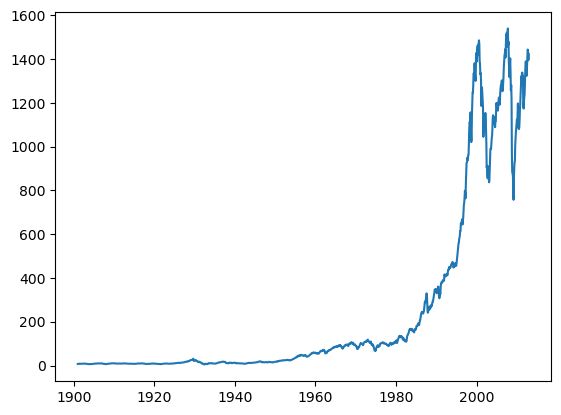

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#CHANGE MOVING AVERAGE WINDOW BELOW (IN MONTHS)
MOVING_AVERAGE_WINDOW = 10
STARTING_BALANCE = 100
#CHANGE YEARS BELOW FOR MORE RECENT DATA (11) AND FOR MEB FABER'S DATA RANGE(112)
YEARS = 112
PERIODS = YEARS * 12

#load data into a pandas dataframe
#CHANGE NAME OF EXCEL FILE TO SPX_recent.csv FOR MORE RECENT DATA AND SPX_simple.csv FOR MEB FABER'S DATA RANGE
data = pd.read_csv('SPX_simple.csv', index_col='Date', parse_dates=['Date'])
#plot chart
plt.plot(data.Close)
plt.show()

In [6]:
#calculate periodic return
data['Nominal_Returns'] = 1+data.NominalReturn
data['SP500_Balance'] = STARTING_BALANCE * data['Nominal_Returns'].cumprod()

In [7]:
#calculate compounded annualized return
SP500_cagr = round((((data['Nominal_Returns'].product()) ** (12/PERIODS))-1) * 100, 2)

#calculate drawdown
data['SP500_Peak'] = data.SP500_Balance.cummax()
data['SP500_DD'] = data.SP500_Balance - data.SP500_Peak
SP500_dd = round((((data.SP500_DD / data.SP500_Peak).min()) * 100), 2)

print(f'S&P500 CAGR: {SP500_cagr}%')
print(f'S&P500 MAX DD: {SP500_dd}%')

S&P500 CAGR: 9.41%
S&P500 MAX DD: -80.68%


### S&P 500 Timing Strategy (1901-2012)

In [9]:
#calculate moving average
data['SMA'] = data.Close.rolling(window = MOVING_AVERAGE_WINDOW).mean()

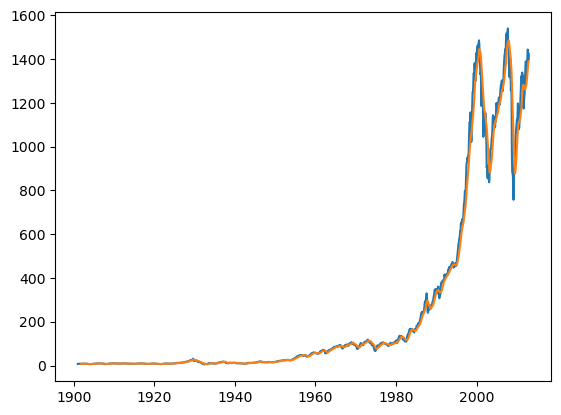

In [10]:
#plot chart with moving average against S&P500
#plot in log scale
plt.plot(data.Close)
plt.plot(data.SMA)
plt.show()

In [11]:
#create signals
data['Buy'] = data.Close > data.SMA

#read tbill data
#CHANGE NAME OF EXCEL FILE TO TBills_recent.csv FOR MORE RECENT DATA AND TBills_simple.csv FOR MEB FABER'S DATA RANGE
tbill = pd.read_csv('TBills_simple.csv', index_col='Index', parse_dates=['Index'])
tbill['DTB3CloseReturns'] = 1+(tbill.DTB3Close)

C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\1203869540.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tbill = pd.read_csv('TBills_simple.csv', index_col='Index', parse_dates=['Index'])


In [12]:
#calculate periodic return
#ADD DELAY BELOW 
#data['Strategy_Return'] = np.where(data.Buy.shift(2) == True, data['Nominal_Returns'], tbill.DTB3CloseReturns)
data['Strategy_Return'] = np.where(data.Buy.shift(1) == True, data['Nominal_Returns'], tbill.DTB3CloseReturns)

#calculate strategy balance
data['Strategy_Balance'] = STARTING_BALANCE * data.Strategy_Return.cumprod()

In [13]:
#calculate compounded annualized return
strategy_cagr = round((((data['Strategy_Return'].product()) ** (12/PERIODS))-1) * 100, 2)

#calculate drawdown
data['Strategy_Peak'] = data.Strategy_Balance.cummax()
data['Strategy_DD'] = data.Strategy_Balance - data.Strategy_Peak
strategy_dd = round((((data.Strategy_DD / data.Strategy_Peak).min()) * 100), 2)

print(strategy_cagr)
print(strategy_dd)

10.37
-43.07


### S&P500 Buy&Hold vs. Timing Strategy Comparison (1901-2012)

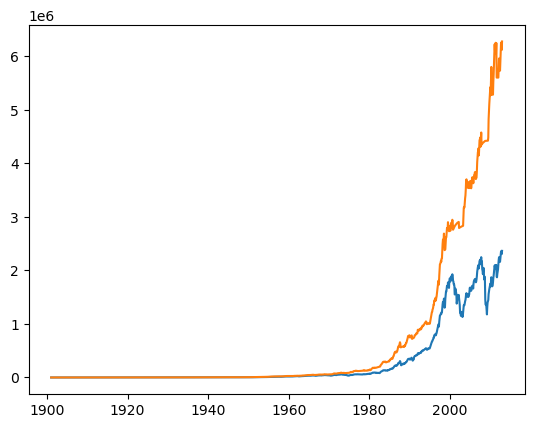

In [15]:
#S&P500 Total Returns vs. Timing Strategy Total Returns (1901-2012)
plt.plot(data.SP500_Balance)
plt.plot(data.Strategy_Balance)

plt.show()

In [16]:
print(f'TESTED RESULTS:')
print('')
print(f'BUY&HOLD CAGR: {SP500_cagr}%')
print(f'BUY&HOLD DD: {SP500_dd}%')
print('')
print(f'Strategy CAGR: {strategy_cagr}%')
print(f'Strategy MAX DD: {strategy_dd}%')

TESTED RESULTS:

BUY&HOLD CAGR: 9.41%
BUY&HOLD DD: -80.68%

Strategy CAGR: 10.37%
Strategy MAX DD: -43.07%


### S&P500 Conclusion (1901-2012)

**REPLICATED RESULTS (10 MONTH SMA):**

- S&P500 CAGR: 9.41%
- S&P500 MAX DD: -80.68%

- Strategy CAGR: 10.37%
- Strategy MAX DD: -43.07%

**MEB FABER'S RESULTS (10 MONTH SMA):**

- S&P500 CAGR: 9.32%
- S&P500 MAX DD: -83.46%

- Strategy CAGR: 10.18%
- Strategy MAX DD: -50.29%

**SENSITIVITY ANALYSIS RESULTS:**

*Delay of 1 month* (Strategy performs worse than Buy & Hold)
- S&P500 CAGR: 9.41%
- S&P500 MAX DD: -80.68%
- Strategy NO DELAY CAGR: 10.37%
- Strategy NO DELAY MAX DD: -43.07%
- Strategy DELAY CAGR: 8.63%
- Strategy DELAY MAX DD: -48.35%

*Higher SMA of 16 months (500 days)* (Strategy still performs better than Buy & Hold)
- S&P500 CAGR: 9.41%
- S&P500 MAX DD: -80.68%
- Strategy 10 MONTH SMA CAGR: 10.37%
- Strategy 10 MONTH MAX DD: -43.07%
- Strategy 16 MONTH CAGR: 9.6%
- Strategy 16 MONTH MAX DD: -45.92%

*Recent data from 2013 to 2023* (Strategy performs worse than Buy & Hold)
- S&P500 RECENT DATA CAGR: 13.75%
- S&P500 RECENT DATA MAX DD: -23.87%
- Strategy RECENT DATA CAGR: 9.61%
- Strategy RECENT DATA MAX DD: -15.61%

## Replication with Multiple Assets - Global Tactical Asset Allocation (GTAA)

**Rules**
<br>
- *SAME AS TIMING MODEL*
- Now with 5 global assets with an equal weighting of 20% to each

*Types of Assets*
1. US stocks: S&P500 (SPY)
2. Foreign stocks: MSCI EAFE
3. Bonds: LUATTRUU
5. Commodities: BCOM
4. Real estate: NAREIT

### GTAA Model Buy & Hold vs. Timing Strategy (1973-2012)

C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\2993477947.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SPXprices = pd.read_csv('SPX_gtaa.csv', index_col='Date', parse_dates=['Date'])
C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\2993477947.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MSCIEAFEprices = pd.read_csv('MSCIEAFE_gtaa.csv', index_col='Date', parse_dates=['Date'])
C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\2993477947.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  LUATTRUUprices = pd.read_csv('LUATTRUU_gtaa.csv', index_col='Date', 

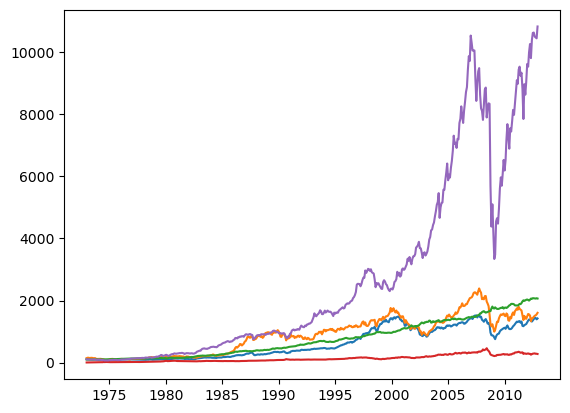

In [22]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#CHANGE MOVING AVERAGE WINDOW BELOW (IN MONTHS)
MOVING_AVERAGE_WINDOW = 9
STARTING_BALANCE = 100
#CHANGE YEARS BELOW FOR MORE RECENT DATA (11) AND FOR MEB FABER'S DATA RANGE (40)
YEARS = 40
PERIODS = YEARS * 12

#load data into a pandas dataframe
#CHANGE NAME OF EXCEL FILES TO SPX_recent.csv FOR MORE RECENT DATA AND SPX_gtaa.csv FOR MEB FABER'S DATA RANGE
SPXprices = pd.read_csv('SPX_gtaa.csv', index_col='Date', parse_dates=['Date'])
MSCIEAFEprices = pd.read_csv('MSCIEAFE_gtaa.csv', index_col='Date', parse_dates=['Date'])
LUATTRUUprices = pd.read_csv('LUATTRUU_gtaa.csv', index_col='Date', parse_dates=['Date'])
BCOMTRprices = pd.read_csv('BCOMTR_gtaa.csv', index_col='Date', parse_dates=['Date'])
FNERTRprices = pd.read_csv('FNERTR_gtaa.csv', index_col='Date', parse_dates=['Date'])

#plot chart
plt.plot(SPXprices.Close)
plt.plot(MSCIEAFEprices.Close)
plt.plot(LUATTRUUprices.Close)
plt.plot(BCOMTRprices.Close)
plt.plot(FNERTRprices.Close)
plt.show()

In [23]:
#calculate periodic return and balances of each asset
SPXprices['Nominal_Returns'] = 1+SPXprices.NominalReturn
SPXprices['SP500_Balance'] = (STARTING_BALANCE/5) * SPXprices['Nominal_Returns'].cumprod()
MSCIEAFEprices['Nominal_Returns'] = 1+MSCIEAFEprices.NominalReturn_MSCIEAFE
MSCIEAFEprices['MSCIEAFE_Balance'] = (STARTING_BALANCE/5) * MSCIEAFEprices['Nominal_Returns'].cumprod()
LUATTRUUprices['Nominal_Returns'] = 1+LUATTRUUprices.NominalReturn_LUATTRUU
LUATTRUUprices['LUATTRUU_Balance'] = (STARTING_BALANCE/5) * LUATTRUUprices['Nominal_Returns'].cumprod()
BCOMTRprices['Nominal_Returns'] = 1+BCOMTRprices.NominalReturn_BCOMTR
BCOMTRprices['BCOMTR_Balance'] = (STARTING_BALANCE/5) * BCOMTRprices['Nominal_Returns'].cumprod()
FNERTRprices['Nominal_Returns'] = 1+FNERTRprices.NominalReturn_FNERTR
FNERTRprices['FNERTR_Balance'] = (STARTING_BALANCE/5) * FNERTRprices['Nominal_Returns'].cumprod()

#calculate whole portfolio balance
#CHANGE NAME OF EXCEL FILE TO GTAA_balance_recent.csv FOR MORE RECENT DATA AND GTAA_balance.csv FOR MEB FABER'S DATA RANGE
GTAA_balance = pd.read_csv('GTAA_balance.csv', index_col='Date', parse_dates=['Date'])
GTAA_balance['GTAA_Balance'] = SPXprices['SP500_Balance'] + MSCIEAFEprices['MSCIEAFE_Balance'] + LUATTRUUprices['LUATTRUU_Balance'] + BCOMTRprices['BCOMTR_Balance'] + FNERTRprices['FNERTR_Balance'] 

C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\3818867884.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  GTAA_balance = pd.read_csv('GTAA_balance.csv', index_col='Date', parse_dates=['Date'])


In [24]:
#calculate compounded annualized returns of each asset
SP500_cagr = round((((SPXprices['Nominal_Returns'].product()) ** (12/PERIODS))-1) * 100, 2)
MSCIEAFE_cagr = round((((MSCIEAFEprices['Nominal_Returns'].product()) ** (12/PERIODS))-1) * 100, 2)
LUATTRUU_cagr = round((((LUATTRUUprices['Nominal_Returns'].product()) ** (12/PERIODS))-1) * 100, 2)
BCOMTR_cagr = round((((BCOMTRprices['Nominal_Returns'].product()) ** (12/PERIODS))-1) * 100, 2)
FNERTR_cagr = round((((FNERTRprices['Nominal_Returns'].product()) ** (12/PERIODS))-1) * 100, 2)

#calculate compounded annualized returns of whole portfolio
total_cagr = (SP500_cagr+MSCIEAFE_cagr+LUATTRUU_cagr+BCOMTR_cagr+FNERTR_cagr)/5
print(f'PORTFOLIO TOTAL CAGR (BUY & HOLD): {total_cagr}%')

#calculate drawdowns of whole portfolio
GTAA_balance['GTAA_balance_Peak'] = GTAA_balance.GTAA_Balance.cummax()
GTAA_balance['GTAA_balance_DD'] = GTAA_balance.GTAA_Balance - GTAA_balance.GTAA_balance_Peak
GTAA_balance_dd = round((((GTAA_balance.GTAA_balance_DD / GTAA_balance.GTAA_balance_Peak).min()) * 100), 2)
print(f'GTAA MAX DD (BUY & HOLD): {GTAA_balance_dd}%')

PORTFOLIO TOTAL CAGR (BUY & HOLD): 9.466000000000001%
GTAA MAX DD (BUY & HOLD): -48.77%


In [25]:
#calculate moving average
SPXprices['SMA'] = SPXprices.Close.rolling(window = MOVING_AVERAGE_WINDOW).mean()
MSCIEAFEprices['SMA'] = MSCIEAFEprices.Close.rolling(window = MOVING_AVERAGE_WINDOW).mean()
LUATTRUUprices['SMA'] = LUATTRUUprices.Close.rolling(window = MOVING_AVERAGE_WINDOW).mean()
BCOMTRprices['SMA'] = BCOMTRprices.Close.rolling(window = MOVING_AVERAGE_WINDOW).mean()
FNERTRprices['SMA'] = FNERTRprices.Close.rolling(window = MOVING_AVERAGE_WINDOW).mean()

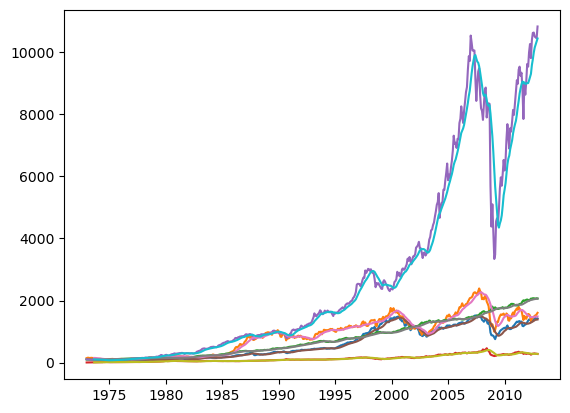

In [26]:
#plot chart with moving average against each asset
plt.plot(SPXprices.Close)
plt.plot(MSCIEAFEprices.Close)
plt.plot(LUATTRUUprices.Close)
plt.plot(BCOMTRprices.Close)
plt.plot(FNERTRprices.Close)
plt.plot(SPXprices.SMA)
plt.plot(MSCIEAFEprices.SMA)
plt.plot(LUATTRUUprices.SMA)
plt.plot(BCOMTRprices.SMA)
plt.plot(FNERTRprices.SMA)
plt.show()

In [27]:
#create signals
SPXprices['Buy'] = SPXprices.Close > SPXprices.SMA
MSCIEAFEprices['Buy'] = MSCIEAFEprices.Close > MSCIEAFEprices.SMA
LUATTRUUprices['Buy'] = LUATTRUUprices.Close > LUATTRUUprices.SMA
BCOMTRprices['Buy'] = BCOMTRprices.Close > BCOMTRprices.SMA
FNERTRprices['Buy'] = FNERTRprices.Close > FNERTRprices.SMA

#read tbill data
#CHANGE NAME OF EXCEL FILE TO TBills_recent.csv FOR MORE RECENT DATA AND TBills_gtaa.csv FOR MEB FABER'S DATA RANGE
tbill_gtaa = pd.read_csv('TBills_gtaa.csv', index_col='Index', parse_dates=['Index'])
tbill_gtaa['DTB3CloseReturns'] = 1+(tbill_gtaa.DTB3Close)

C:\Users\dinga\AppData\Local\Temp\ipykernel_21584\1696860897.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tbill_gtaa = pd.read_csv('TBills_gtaa.csv', index_col='Index', parse_dates=['Index'])


In [28]:
#calculate periodic return
#ADD DELAY BELOW 
#data['Strategy_Return'] = np.where(data.Buy.shift(2) == True, data['Nominal_Returns'], tbill.DTB3CloseReturns)
SPXprices['Strategy_Return'] = np.where(SPXprices.Buy.shift(1) == True, SPXprices['Nominal_Returns'], tbill_gtaa.DTB3CloseReturns)
SPXprices['SP500_Strategy_Balance'] = (STARTING_BALANCE/5) * SPXprices.Strategy_Return.cumprod()
MSCIEAFEprices['Strategy_Return'] = np.where(MSCIEAFEprices.Buy.shift(1)== True, MSCIEAFEprices['Nominal_Returns'], tbill_gtaa.DTB3CloseReturns)
MSCIEAFEprices['MSCIEAFE_Strategy_Balance'] = (STARTING_BALANCE/5) * MSCIEAFEprices.Strategy_Return.cumprod()
LUATTRUUprices['Strategy_Return'] = np.where(LUATTRUUprices.Buy.shift(1)== True, LUATTRUUprices['Nominal_Returns'], tbill_gtaa.DTB3CloseReturns)
LUATTRUUprices['LUATTRUU_Strategy_Balance'] = (STARTING_BALANCE/5) * LUATTRUUprices.Strategy_Return.cumprod()
BCOMTRprices['Strategy_Return'] = np.where(BCOMTRprices.Buy.shift(1)== True, BCOMTRprices['Nominal_Returns'], tbill_gtaa.DTB3CloseReturns)
BCOMTRprices['BCOMTR_Strategy_Balance'] = (STARTING_BALANCE/5) * BCOMTRprices.Strategy_Return.cumprod()
FNERTRprices['Strategy_Return'] = np.where(FNERTRprices.Buy.shift(1) == True, FNERTRprices['Nominal_Returns'], tbill_gtaa.DTB3CloseReturns)
FNERTRprices['FNERTR_Strategy_Balance'] = (STARTING_BALANCE/5) * FNERTRprices.Strategy_Return.cumprod()

#calculate whole portfolio balance
GTAA_balance['GTAA_Strategy_Balance'] = SPXprices['SP500_Strategy_Balance'] + MSCIEAFEprices['MSCIEAFE_Strategy_Balance'] + LUATTRUUprices['LUATTRUU_Strategy_Balance'] + BCOMTRprices['BCOMTR_Strategy_Balance'] + FNERTRprices['FNERTR_Strategy_Balance'] 

In [29]:
#calculate compounded annualized return
SP500_strategy_cagr = round((((SPXprices['Strategy_Return'].product()) ** (12/PERIODS))-1) * 100, 2)
MSCIEAFE_strategy_cagr = round((((MSCIEAFEprices['Strategy_Return'].product()) ** (12/PERIODS))-1) * 100, 2)
LUATTRUU_strategy_cagr = round((((LUATTRUUprices['Strategy_Return'].product()) ** (12/PERIODS))-1) * 100, 2)
BCOMTR_strategy_cagr = round((((BCOMTRprices['Strategy_Return'].product()) ** (12/PERIODS))-1) * 100, 2)
FNERTR_strategy_cagr = round((((FNERTRprices['Strategy_Return'].product()) ** (12/PERIODS))-1) * 100, 2)

#calculate compounded annualized returns of whole portfolio
total_strategy_cagr = (SP500_strategy_cagr+MSCIEAFE_strategy_cagr+LUATTRUU_strategy_cagr+BCOMTR_strategy_cagr+FNERTR_strategy_cagr)/5
print(f'PORTFOLIO TOTAL CAGR (MOVING AVERAGE TIMING): {total_strategy_cagr}%')

#calculate drawdowns of whole portfolio
GTAA_balance['GTAA_Strategy_balance_Peak'] = GTAA_balance.GTAA_Strategy_Balance.cummax()
GTAA_balance['GTAA_Strategy_balance_DD'] = GTAA_balance.GTAA_Strategy_Balance - GTAA_balance.GTAA_Strategy_balance_Peak
GTAA_Strategy_balance_dd = round((((GTAA_balance.GTAA_Strategy_balance_DD / GTAA_balance.GTAA_Strategy_balance_Peak).min()) * 100), 2)
print(f'GTAA MAX DD (MOVING AVERAGE TIMING): {GTAA_Strategy_balance_dd}%')

PORTFOLIO TOTAL CAGR (MOVING AVERAGE TIMING): 10.136%
GTAA MAX DD (MOVING AVERAGE TIMING): -18.66%


### GTAA Model Comparison (1973-2012)

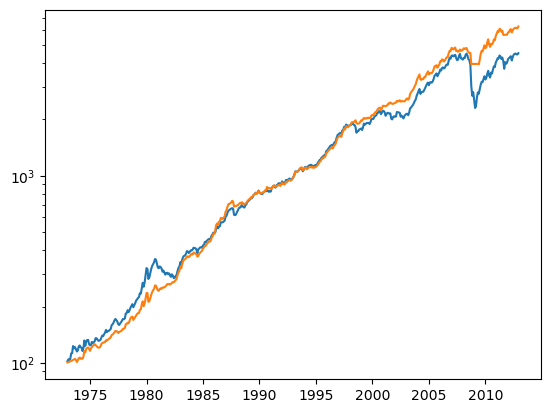

In [31]:
#Buy & Hold Total Returns vs. Timing Strategy Total Returns (1973-2012)
plt.plot(GTAA_balance.GTAA_Balance)
plt.plot(GTAA_balance.GTAA_Strategy_Balance)
plt.yscale("log")

plt.show()

In [32]:
print(f'TESTED RESULTS:')
print('')
print(f'Buy & Hold CAGR: {total_cagr}%')
print(f'Buy & Hold MAX DD: {GTAA_balance_dd}%')
print('')
print(f'Strategy CAGR: {total_strategy_cagr}%')
print(f'Strategy MAX DD: {GTAA_Strategy_balance_dd}%')

TESTED RESULTS:

Buy & Hold CAGR: 9.466000000000001%
Buy & Hold MAX DD: -48.77%

Strategy CAGR: 10.136%
Strategy MAX DD: -18.66%


### GTAA Model Conclusion (1973-2012)

**REPLICATED RESULTS (9 MONTH SMA):**

- Buy & Hold CAGR: 9.47%
- Buy & Hold MAX DD: -48.77%

- Strategy CAGR: 10.14%
- Strategy MAX DD: -18.66%

**MEB FABER'S RESULTS (9 MONTH SMA):**

- Buy & Hold CAGR: 9.92%
- Buy & Hold MAX DD: -46.00%

- Strategy CAGR: 10.73%
- Strategy MAX DD: -10.31%

**SENSITIVITY ANALYSIS RESULTS:**

*Delay of 1 day* (Strategy performs worse than Buy & Hold)
- Buy & Hold CAGR: 9.47%
- Buy & Hold MAX DD: -48.77%
- Strategy NO DELAY CAGR: 10.14%
- Strategy NO DELAY MAX DD: -18.66%
- Strategy DELAY CAGR: 8.55% 
- Strategy DELAY MAX DD: -19.762% 

*Higher SMA of 16 months (500 days)* (Strategy performs better than Buy & Hold)
- Buy & Hold CAGR: 9.12%
- Buy & Hold MAX DD: -48.77%
- Strategy 9 MONTH SMA CAGR: 10.14%
- Strategy 9 MONTH SMA  MAX DD: -18.66%
- Strategy 16 MONTH SMA  CAGR: 10.19% (Better performance)
- Strategy 16 MONTH SMA  MAX DD: -15.64% (Better performance)

*Recent data from 2013 to 2023* (Strategy performs better than Buy & Hold)
- ALL ASSETS RECENT DATA CAGR: 5.3%
- ALL ASSETS RECENT DATA MAX DD: -24.03%
- Strategy RECENT DATA CAGR: 5.47%
- Strategy RECENT DATA MAX DD: -10.85%

## Explanation for Differences in Results

**Why is the GTAA model able to perform better?**
- The trend following strategy allows the portfolio to avoid the large negative tail losses. In other words, it prevents major losses from bear markets.

**Use different Simple Moving Average Windows:**
- SMA sensitivity is very robust as changing the moving average window has minimal effect on returns
- This is because the momentum from a certain event is included in all following calculations of SMA. For example, if an event happens in the base month, the calculations for 3, 9, 12, and 16 month SMA will conserve the momentum of the event.
- Longer SMAs reduce whipsaws (false signals) 

**Add a delay:**
- Can't delay by too much. This shows that the efficay of the signals declines fast
- There might be a delay with brokerages for processing the order
- If signals are generated after market hours then the actual execution can only occur when the market reopens the next day
- In a more applicable view to real world use cases, there might be decision making delays or regulatory requirements that hold up the transaction
- A lot of people

**Test on more recent modern data:** 

**Update Timing Strategy at different time frames:**
- Many institutional investors rebalance at the end of the month which can create predictable price patterns. Turn of the month effect.
- Volatility differences in the middle of the month compared to the end of the month?
- Market trends that become more apparent at the end of the month due to strong signal validation. Mid-month signals might be weaker and less reliable.